In [2]:
import networkx as nx
from itertools import combinations
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.special import comb
import powerlaw
from math import factorial
from scipy.optimize import curve_fit
# from decimal import *

### Random graph

In [3]:
def random_graph(N, p):
    """
        Function to generate a random graph. 
        
        Args:
            N - number of nodes (int),
            p - probability of connecting two nodes (number from 0 to 1).
    """
    
    assert type(N) == int
    assert (type(p) == int or type(p) == float)
    assert 0 <= p <= 1
    
    nodes = list(range(N))
    pairs = list(combinations(nodes, 2))
    num = len(pairs)
    G = nx.Graph()
    G.add_nodes_from(nodes)
    for i in range(num):
        pair = pairs[i]
        q = np.random.uniform()
        if q < p:
            G.add_edge(*pair)
    return G

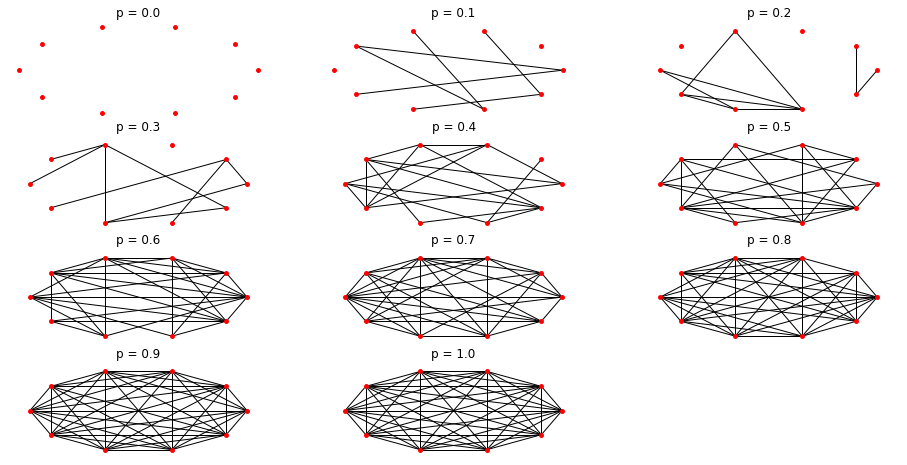

In [3]:
ps = [round(0.1 * i, 1) for i in range(11)]
plt.figure(figsize=(16,8))
for i in range(len(ps)):
    plt.subplot(4, 3, i+1)
    g = random_graph(10, ps[i])
    plt.title(f"p = {ps[i]}")
    nx.draw_circular(g, node_size=15, node_color='red')

#### N=2000, p=0.1

In [4]:
p1 = 0.1
rg1 = random_graph(2000, p1)

drg1 = [i[1] for i in rg1.degree]
avg_deg_rg1 = sum(drg1) / 2000
deg_var_rg1 = np.var(drg1)

print(f"Number of vertices: {len(rg1.nodes())}, probablity of connecting vertices: {p1}, number of edges: {len(rg1.edges())} \n")
print(f"Average degree (empirical): {avg_deg_rg1}, degree variance (empirical): {deg_var_rg1} \n")

Number of vertices: 2000, probablity of connecting vertices: 0.1, number of edges: 200443 

Average degree (empirical): 200.443, degree variance (empirical): 178.89875099999998 



In [5]:
densrg1 = []
for i in drg1:
    occur = drg1.count(i)
    densrg1.append(occur/len(drg1))

In [6]:
dist1_binom = stats.nbinom
bound1_binom = [(1990, 2010), (0, 0.1)]
fit1_binom = stats.fit(dist1_binom, drg1, bound1_binom)
n1_binom = int(fit1_binom.params[0])
p1_binom = fit1_binom.params[1]
r1_binom = np.arange(0, n1_binom + 1)
rg1_binom = stats.binom.pmf(r1_binom, n1_binom, p1_binom)

c:\users\ada_m\appdata\local\programs\python\python38-32\lib\site-packages\scipy\stats\_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


In [7]:
print(f"Average degree (binom): {n1_binom*p1_binom}, degree variance (binom): {n1_binom*p1_binom*(1-p1_binom)} \n")

Average degree (binom): 199.0, degree variance (binom): 179.1 



In [8]:
dist1_poiss = stats.poisson
bound1_poiss = [(avg_deg_rg1-10, avg_deg_rg1+10)]
fit1_poiss = stats.fit(dist1_poiss, drg1, bound1_poiss)
mu1_poiss = fit1_poiss.params[0]
r1_poiss = r1_binom
rg1_poiss = stats.poisson.pmf(r1_binom, mu1_poiss)

In [9]:
print(f"Average degree (poiss): {mu1_poiss}, degree variance (poiss): {mu1_poiss} \n")

Average degree (poiss): 200.44269305207692, degree variance (poiss): 200.44269305207692 



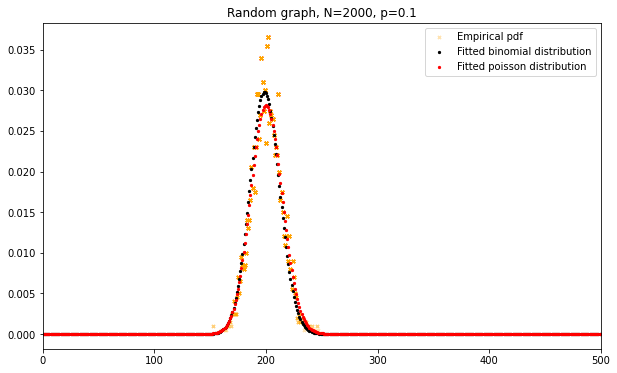

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(drg1, densrg1, label="Empirical pdf", color="orange", s=10, marker='x', alpha=0.3)
plt.scatter(r1_binom, rg1_binom, label="Fitted binomial distribution", color="black", s=5)
plt.scatter(r1_poiss, rg1_poiss, label="Fitted poisson distribution", color="red", s=5)
plt.xlim([0, 500])
plt.title("Random graph, N=2000, p=0.1")
plt.legend()
plt.show()

#### N=2000, p=0.6

In [14]:
p2 = 0.6
rg2 = random_graph(2000, p2)

drg2 = [i[1] for i in rg2.degree]
avg_deg_rg2 = sum(drg2) / 2000
deg_var_rg2 = np.var(drg2)

print(f"Number of vertices: {len(rg2.nodes())}, probablity of connecting vertices: {p2}, number of edges: {len(rg2.edges())} \n")
print(f"Average degree (empirical): {avg_deg_rg2}, degree variance (empirical): {deg_var_rg2} \n")

Number of vertices: 2000, probablity of connecting vertices: 0.6, number of edges: 1198581 

Average degree (empirical): 1198.581, degree variance (empirical): 471.25743900000003 



In [15]:
densrg2 = []
for i in drg2:
    occur = drg2.count(i)
    densrg2.append(occur/len(drg2))

In [16]:
dist2_binom = stats.nbinom
bound2_binom = [(1990, 2010), (0.5, 0.6)]
fit2_binom = stats.fit(dist2_binom, drg2, bound2_binom)
n2_binom = int(fit2_binom.params[0])
p2_binom = fit2_binom.params[1]
r2_binom = np.arange(0, n2_binom + 1)
rg2_binom = stats.binom.pmf(r2_binom, n2_binom, p2_binom)

c:\users\ada_m\appdata\local\programs\python\python38-32\lib\site-packages\scipy\stats\_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


In [17]:
print(f"Average degree (binom): {n2_binom*p2_binom}, degree variance (binom): {n2_binom*p2_binom*(1-p2_binom)} \n")

Average degree (binom): 1193.9999186248626, degree variance (binom): 477.6000162750241 



In [18]:
dist2_poiss = stats.poisson
bound2_poiss = [(avg_deg_rg2-10, avg_deg_rg2+10)]
fit2_poiss = stats.fit(dist2_poiss, drg2, bound2_poiss)
mu2_poiss = fit2_poiss.params[0]
r2_poiss = r2_binom
rg2_poiss = stats.poisson.pmf(r2_binom, mu2_poiss)

In [19]:
print(f"Average degree (poiss): {mu2_poiss}, degree variance (poiss): {mu2_poiss} \n")

Average degree (poiss): 1198.816947890844, degree variance (poiss): 1198.816947890844 



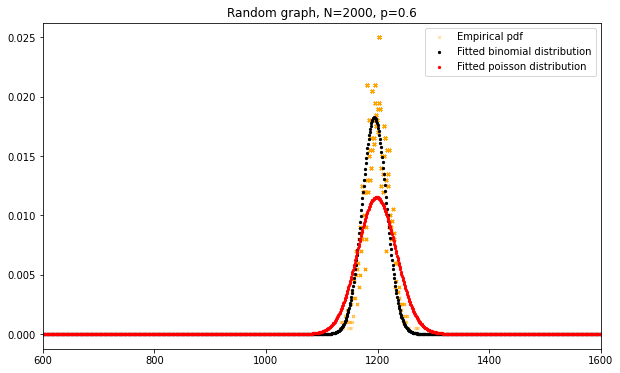

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(drg2, densrg2, label="Empirical pdf", color="orange", s=7, marker='x', alpha=0.3)
plt.scatter(r2_binom, rg2_binom, label="Fitted binomial distribution", color="black", s=5)
plt.scatter(r2_poiss, rg2_poiss, label="Fitted poisson distribution", color="red", s=5)
plt.xlim([600, 1600])
plt.title("Random graph, N=2000, p=0.6")
plt.legend()
plt.show()

### Watts-Strogatz

In [21]:
def watts_strogatz(N, p, K):
    """
        Function to generate Watts-Strogartz graph. 

        Args:
            N - number of nodes (int),
            p - probability of rewiring a connection (int or float from 0 to 1),
            K - initial number of neighbours for each node (int), must be an even number.
    """

    assert type(N) == int
    assert (type(p) == int or type(p) == float)
    assert 0 <= p <= 1
    assert type(K) == int
    assert K % 2 == 0
    
    one_side = int(K/2 + 1)
    G = nx.circulant_graph(N, list(range(1, one_side))) # K must be even!!!
    nodes = list(G.nodes())
    for i in range(N):
        node = nodes[i]
        for j in range(1, one_side):
            q = np.random.uniform()
            if q < p:
                next_node = nodes[(i + j) % N]
                forbidden = [j for j in G.neighbors(node)] + [node]
                possible = [j for j in nodes if j not in forbidden]
                G.remove_edge(node, next_node)
                new = np.random.choice(possible)
                G.add_edge(node, new)
    return G

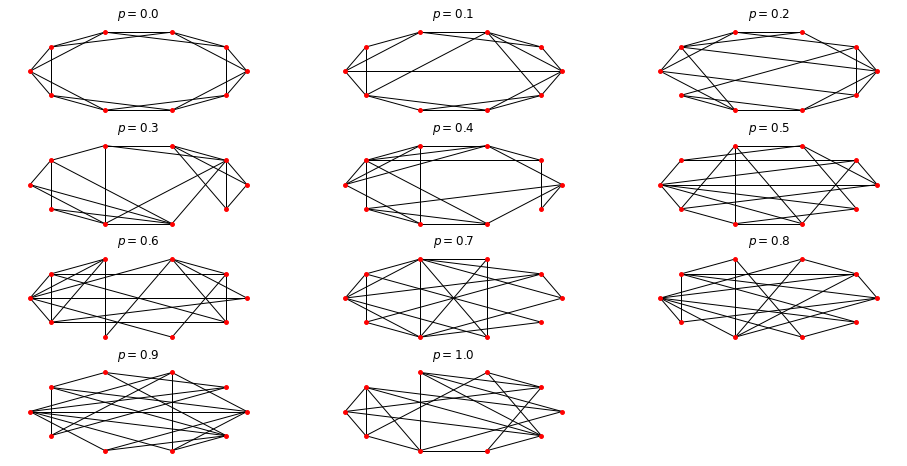

In [74]:
ps = [round(0.1 * i, 1) for i in range(11)]
plt.figure(figsize=(16,8))
for i in range(len(ps)):
    plt.subplot(4, 3, i+1)
    g = watts_strogatz(10, ps[i], 4)
    plt.title(f"p = {ps[i]}")
    nx.draw_circular(g, node_size=15, node_color='red')

In [38]:
def pk(k, K, p):
    """
        Function to compute single probability in Watts-Strogratz degree distribution.
        
        Args:
            k - degree,
            p - probability of rewiring a connection,
            K - initial number of neighbours for each node, must be an even number.
        
    """
    
    p = 0
    for n in range(int(min(k - K/2, K/2))+1):
        p += comb(K/2, n)*((1-p)**n)*(p**(K/2-n))*(((p*K/2)**(k-n-K/2))/(factorial(int(k-n-K/2))))*np.exp(-p*K/2)
    return p 

In [39]:
def pks(ks, K, p):
    """
        Function to compute Watts-Strogratz degree distribution.
        
        Args:
            ks - degree list or array,
            p - probability of rewiring a connection,
            K - initial number of neighbours for each node, must be an even number.
        
    """    
    ps = []
    for k in ks:
        p = pk(k, K, p)
        ps.append(p)
    return ps

#### N=2000, p=0.1, K=6

In [31]:
p1 = 0.5
ws1 = watts_strogatz(2000, p1, 6)

dws1 = [i[1] for i in ws1.degree]
avg_deg_ws1 = sum(dws1) / 2000
deg_var_ws1 = np.var(dws1)

print(f"Number of vertices: {len(ws1.nodes())}, probablity of relink: {p1}, number of edges: {len(ws1.edges())} \n")
print(f"Average degree (empirical): {avg_deg_ws1}, degree variance (empirical): {deg_var_ws1} \n")

Number of vertices: 2000, probablity of relink: 0.5, number of edges: 6000 

Average degree (empirical): 6.0, degree variance (empirical): 2.255 



In [32]:
densws1 = []
for i in dws1:
    occur = dws1.count(i)
    densws1.append(occur/len(dws1))

In [33]:
kvals1 = list(range(1, 2000))

In [40]:
params1, cov1 = curve_fit(pks, kvals1, dws1) # factorial won't compute for such a large number

OverflowError: int too large to convert to float

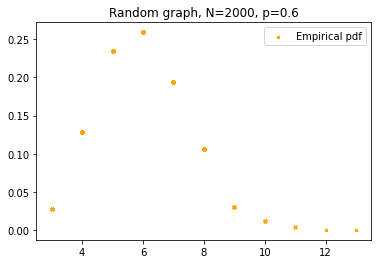

In [42]:
plt.scatter(dws1, densws1, label="Empirical pdf", color="orange", s=7, marker='x')
plt.title("Random graph, N=2000, p=0.6")
plt.legend()
plt.show()

#### N=100, p=0.2, K=4

In [43]:
p2 = 0.2
ws2 = watts_strogatz(100, p2, 4)

dws2 = [i[1] for i in ws2.degree]
avg_deg_ws2 = sum(dws2) / 100
deg_var_ws2 = np.var(dws2)

print(f"Number of vertices: {len(ws2.nodes())}, probablity of relink: {p2}, number of edges: {len(ws2.edges())} \n")
print(f"Average degree (empirical): {avg_deg_ws2}, degree variance (empirical): {deg_var_ws2} \n")

Number of vertices: 100, probablity of relink: 0.2, number of edges: 200 

Average degree (empirical): 4.0, degree variance (empirical): 0.66 



In [44]:
densws2 = []
for i in dws2:
    occur = dws2.count(i)
    densws2.append(occur/len(dws2))

In [45]:
kvals2 = list(range(1, 101))

In [46]:
params2, cov2 = curve_fit(pks, kvals2, dws2)

c:\users\ada_m\appdata\local\programs\python\python38-32\lib\site-packages\scipy\optimize\_minpack_py.py:881: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [48]:
params2 # smth wrong

array([1., 1.])

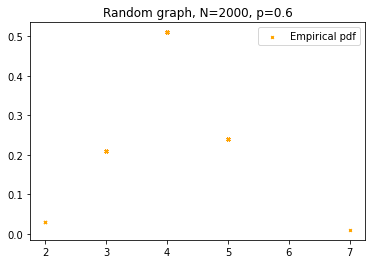

In [49]:
plt.scatter(dws2, densws2, label="Empirical pdf", color="orange", s=7, marker='x')
plt.title("Random graph, N=2000, p=0.6")
plt.legend()
plt.show()

### Barabasi-Albert

In [50]:
def barabasi_albert(N, K0, K, save_history=False):
    """
        Function to generate Barabasi-Albert graph. 

        Args:
            N - number of nodes (int),
            K0 - initial number of nodes (int) - must be positive and less than N,
            K - number of links for each newly added node (int) - must be positive and less or equal to K
            save_history - boolean flag, False by default; if set to True, will also save a set of edges 
            after each iteration to the list.
    """
    
    assert type(N) == int
    assert type(K0) == int
    assert type(K) == int
    assert 0 < K0 < N # initial number of nodes
    assert 0 < K <= K0 # number of links for new nodes
    
    G = nx.star_graph(K0 - 1) # connected graph with K0 nodes
    
    if save_history == True:
        history = [list(G.edges)]
        for i in range(N - K0):
            node_deg = list(G.degree)
            nodes = [j[0] for j in node_deg]
            degs = [j[1] for j in node_deg]
            sum_deg = sum(degs)
            ps = [j / sum_deg for j in degs]
            targets = np.random.choice(nodes, p=ps, size=K, replace=False)
            new_node = len(nodes)
            G.add_node(new_node)
            new_edges = [(new_node, j) for j in targets]
            G.add_edges_from(new_edges)
            history.append(list(G.edges()))
        
        return G, history

    else:
        for i in range(N - K0):
            node_deg = list(G.degree)
            nodes = [j[0] for j in node_deg]
            degs = [j[1] for j in node_deg]
            sum_deg = sum(degs)
            ps = [j / sum_deg for j in degs]
            targets = np.random.choice(nodes, p=ps, size=K, replace=False)
            new_node = len(nodes)
            G.add_node(new_node)
            new_edges = [(new_node, j) for j in targets]
            G.add_edges_from(new_edges)
            
        return G

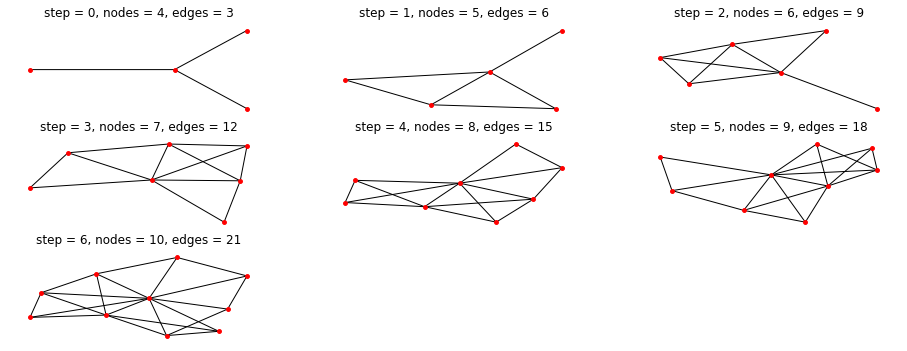

In [59]:
ba = barabasi_albert(10, 4, 3, save_history=True)

ba_hist = ba[1]
plot_num = len(ba_hist)

plt.figure(figsize=(16,8))
for i in range(plot_num):
    g = nx.Graph()
    g.add_edges_from(ba_hist[i])
    nodes = len(g.nodes())
    edges = len(g.edges())
    plt.subplot(4, 3, i+1)
    plt.title(f"step = {i}, nodes = {nodes}, edges = {edges}")
    nx.draw(g, node_size=15, node_color='red')

#### N=2000, K0=100, K=99

In [51]:
ba1 = barabasi_albert(2000, 100, 99)

dba1 = [i[1] for i in ba1.degree]
avg_deg_ba1 = sum(dba1) / 2000
deg_var_ba1 = np.var(dba1)

print(f"Number of vertices: {len(ba1.nodes())}, number of edges: {len(ba1.edges())} \n")
print(f"Average degree (empirical): {avg_deg_ba1}, degree variance (empirical): {deg_var_ba1} \n")

Number of vertices: 2000, number of edges: 188199 

Average degree (empirical): 188.199, degree variance (empirical): 12471.634399 



In [52]:
densba1 = []
for i in dba1:
    occur = dba1.count(i)
    densba1.append(occur/len(dba1))

In [53]:
fit1_power = powerlaw.Fit(dba1)

Calculating best minimal value for power law fit


In [54]:
a1 = fit1_power.alpha
a1

2.9217546055101815

In [55]:
xm1 = fit1_power.xmin
xm1

99.0

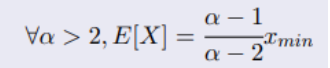

In [57]:
print(f'Average degree (theoretical): {((a1-1)/(a1-2))*xm1}')

Average degree (theoretical): 206.4038571743339


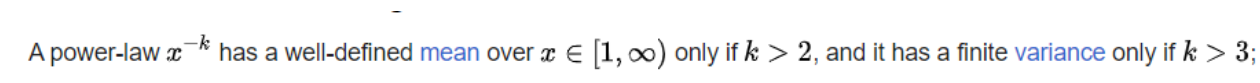

Hence, no variance to compute.

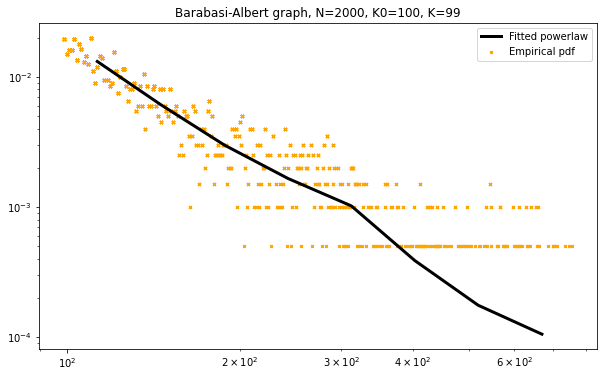

In [58]:
plt.figure(figsize=(10,6))
plt.scatter(dba1, densba1, label="Empirical pdf", color="orange", s=7, marker='x')
fit1_power.plot_pdf(color='black', linewidth=3, label="Fitted powerlaw")  
plt.legend()
plt.title('Barabasi-Albert graph, N=2000, K0=100, K=99')
plt.show()

#### N=2000, K0=200, K=150

In [59]:
ba2 = barabasi_albert(2000, 50, 49)

dba2 = [i[1] for i in ba2.degree]
avg_deg_ba2 = sum(dba2) / 2000
deg_var_ba2 = np.var(dba2)

print(f"Number of vertices: {len(ba2.nodes())}, number of edges: {len(ba2.edges())} \n")
print(f"Average degree (empirical): {avg_deg_ba2}, degree variance (empirical): {deg_var_ba2} \n")

Number of vertices: 2000, number of edges: 95599 

Average degree (empirical): 95.599, degree variance (empirical): 4627.212199 



In [60]:
densba2 = []
for i in dba2:
    occur = dba2.count(i)
    densba2.append(occur/len(dba2))

In [61]:
fit2_power = powerlaw.Fit(dba2)

Calculating best minimal value for power law fit


In [62]:
a2 = fit2_power.alpha
a2

2.928672311151259

In [63]:
xm2 = fit2_power.xmin
xm2

49.0

In [64]:
print(f'Average degree (theoretical): {((a2-1)/(a2-2))*xm2}')

Average degree (theoretical): 101.76349839617328


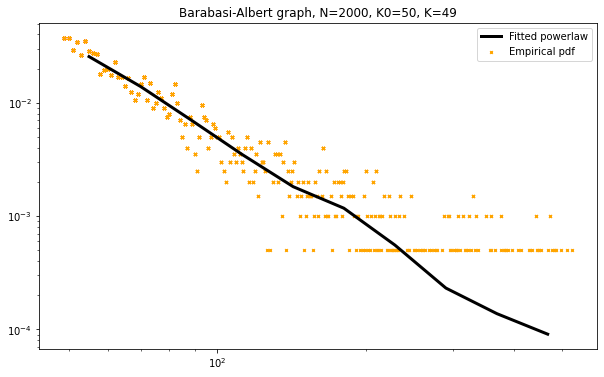

In [65]:
plt.figure(figsize=(10,6))
plt.scatter(dba2, densba2, label="Empirical pdf", color="orange", s=7, marker='x')
fit2_power.plot_pdf(color='black', linewidth=3, label="Fitted powerlaw")
plt.legend()
plt.title('Barabasi-Albert graph, N=2000, K0=50, K=49')
plt.show()

### Web scraping

#### References:

https://www.youtube.com/watch?v=KQiDLVa9sX4

https://medium.com/analytics-vidhya/read-your-network-of-friends-in-facebook-by-scraping-with-python-a012adabb713

In [66]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager 
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
import time
import getpass
import pandas as pd

In [10]:
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.get("https://www.facebook.com/")
driver.maximize_window()

[WDM] - Downloading: 100%|████████████████████████████████████████████████████████| 6.80M/6.80M [00:00<00:00, 24.6MB/s]
<ipython-input-10-6e2451f8cfc2>:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


In [11]:
cookies_button = driver.find_element(By.XPATH, "//button[@title='Zezwól na korzystanie z niezbędnych i opcjonalnych plików cookie']")
cookies_button.click()
time.sleep(5)

In [12]:
user_id = "majchrzak.ada.99@gmail.com"
my_password = getpass.getpass()

········


In [13]:
user_name = driver.find_element(By.XPATH, "//input[@type='text']")
user_name.send_keys(user_id)

In [14]:
password = driver.find_element(By.XPATH, "//input[@type='password']")
password.send_keys(my_password)

In [15]:
log_in_button = driver.find_element(By.XPATH, "//button[@name='login']")
log_in_button.click()
time.sleep(5)

In [8]:
my_profile = driver.find_element(By.XPATH, "//span[text()='Ada Majchrzak']")
my_profile.click()
time.sleep(5)

In [111]:
friends_tab = driver.find_element(By.XPATH, "//span[text()='Znajomi']")
friends_tab.click()
time.sleep(5)

In [144]:
reached_page_end = False
last_height = driver.execute_script("return document.body.scrollHeight")
while not reached_page_end:
    driver.find_element(By.XPATH, '//body').send_keys(Keys.END) 
    time.sleep(5)
    new_height = driver.execute_script("return document.body.scrollHeight")
    if last_height == new_height:
        reached_page_end = True
    else:
        last_height = new_height

In [148]:
friends = driver.find_elements(By.XPATH, "//div[@class='x1iyjqo2 x1pi30zi']")

In [171]:
names = []
links = []

In [172]:
for f in friends:
    names.append(f.text)
    try:
        link = f.find_element(By.XPATH, ".//a").get_attribute("href")
        links.append(link)
    except Exception:
        links.append("")

In [202]:
names_df = pd.DataFrame(names, columns=['name'])

In [203]:
names_df.head()

,name
0,Daria Baranowska\n89 wspólnych znajomych
1,Bora Copur\n4 wspólnych znajomych
2,Joanna Gajęcka\n5 wspólnych znajomych
3,Karol Majchrzak\n11 wspólnych znajomych
4,Sebastian Janus\n45 wspólnych znajomych


In [204]:
friends_df = names_df['name'].str.split('\n', expand=True)

In [205]:
friends_df['links'] = links

In [236]:
friends_df.columns = ['name', 'col1', 'col2', 'col3', 'link']

In [237]:
friends_df.head()

,name,col1,col2,col3,link
0,Daria Baranowska,89 wspólnych znajomych,None,None,https://www.facebook.com/daria.baranowska.12
1,Bora Copur,4 wspólnych znajomych,None,None,https://www.facebook.com/boracopur
2,Joanna Gajęcka,5 wspólnych znajomych,None,None,https://www.facebook.com/joanna.gajecka.3
3,Karol Majchrzak,11 wspólnych znajomych,None,None,https://www.facebook.com/karol.j.majchrzak
4,Sebastian Janus,45 wspólnych znajomych,None,None,https://www.facebook.com/sebastianj2031


In [238]:
common_df = friends_df[friends_df['col1'].notna()]

In [239]:
nogroup_df = common_df[common_df['col2'].isna()]
nogroup_df.head()

,name,col1,col2,col3,link
0,Daria Baranowska,89 wspólnych znajomych,None,None,https://www.facebook.com/daria.baranowska.12
1,Bora Copur,4 wspólnych znajomych,None,None,https://www.facebook.com/boracopur
2,Joanna Gajęcka,5 wspólnych znajomych,None,None,https://www.facebook.com/joanna.gajecka.3
3,Karol Majchrzak,11 wspólnych znajomych,None,None,https://www.facebook.com/karol.j.majchrzak
4,Sebastian Janus,45 wspólnych znajomych,None,None,https://www.facebook.com/sebastianj2031


In [240]:
clear_df = nogroup_df[['name', 'link']]
clear_df.head()

,name,link
0,Daria Baranowska,https://www.facebook.com/daria.baranowska.12
1,Bora Copur,https://www.facebook.com/boracopur
2,Joanna Gajęcka,https://www.facebook.com/joanna.gajecka.3
3,Karol Majchrzak,https://www.facebook.com/karol.j.majchrzak
4,Sebastian Janus,https://www.facebook.com/sebastianj2031


In [241]:
clear_df.to_csv('myfriends.csv')

In [79]:
maindf = pd.read_csv('myfriends.csv')[['name', 'link']]
maindf.head()

,name,link
0,Daria Baranowska,https://www.facebook.com/daria.baranowska.12
1,Bora Copur,https://www.facebook.com/boracopur
2,Joanna Gajęcka,https://www.facebook.com/joanna.gajecka.3
3,Karol Majchrzak,https://www.facebook.com/karol.j.majchrzak
4,Sebastian Janus,https://www.facebook.com/sebastianj2031


In [68]:
len(maindf)

320

In [32]:
# I pulled data in batches just changing the range of the loop, only last batch pull visible here
for i in range(200, 320):
    link = maindf.iloc[i, 1]
    driver.get(link+'/friends')
    time.sleep(2)
    
    reached_page_end = False
    last_height = driver.execute_script("return document.body.scrollHeight")
    while not reached_page_end:
        driver.find_element(By.XPATH, '//body').send_keys(Keys.END) 
        time.sleep(5)
        new_height = driver.execute_script("return document.body.scrollHeight")
        if last_height == new_height:
            reached_page_end = True
        else:
            last_height = new_height
            
    friendsL2 = driver.find_elements(By.XPATH, "//div[@class='x1iyjqo2 x1pi30zi']")
    namesL2 = [f.text for f in friendsL2]
    #friends_of_friends.append(namesL2)
    
    if len(namesL2) == 0:
        names_list = ['No friends found']
    else:
        raw_df = pd.DataFrame(namesL2, columns=['name'])
        split_df = raw_df['name'].str.split('\n', expand=True)
        split_df = split_df.iloc[:, 0:2]
        split_df.columns = ['col1', 'col2']
        nona_df = split_df.dropna()
        people_df = nona_df[(nona_df['col2'].str[0].str.isdigit()) & (nona_df['col2'].str.contains('wspólny'))]
        names_list = list(people_df['col1'])

    with open("friends_raw.txt", "a", encoding="utf-8") as document:
        names_str = str(names_list)
        document.write(names_str + ';')

In [73]:
separate = []
with open('friends_raw.txt', encoding='utf-8') as fp:
    contents = fp.read()
    for entry in contents.split(';'):
        separate.append(entry)
separate = separate[:-1] # last element is empty

In [70]:
len(separate)

320

In [75]:
for i in range(len(separate)):
    separate[i] = separate[i].strip('[')
    separate[i] = separate[i].strip(']')
    separate[i] = separate[i].replace("'","")
    separate[i] = separate[i].split(', ')

In [76]:
separate[0] # converted well to list of strings

['Patrycja Walczak',
 'Kamila Sprawka',
 'Natalia Bury',
 'Jakub Derda',
 'Marcin Kasprzak',
 'Damian Kruk',
 'Patryk Szydlik',
 'Piotrek Wiliński',
 'Aleksandra Kmiotek',
 'Zuzanna Rybarska',
 'Natalia Sywiec',
 'Szymon Dadun',
 'Dominika Walczak',
 'Aleksandra Przygoda',
 'Weronika Własak',
 'Natalia Łukasik',
 'Martyna Sielska',
 'Jedrzej Karpisz',
 'Hania Biernacka',
 'Kacper Siewruk',
 'Patrycja Stasiak',
 'Klaudia Bernacka',
 'Ola Winnik',
 'Kasia Łosowicka',
 'Witek Leszczyński',
 'Dominika Rynkiewicz',
 'Kacper Osek',
 'Ewa Kupczyk',
 'Anna Szymańska',
 'Adrian Szczepanski',
 'Michalina Kozaryn',
 'Weronika Kaszczyk',
 'Paulina Śniowska',
 'Kacper Wojtasik',
 'Zuzanna Walczak',
 'Kajka Udyrysz',
 'Aleksandra Saj',
 'Ka Sia',
 'Paula Stefańska',
 'Patryk Margiewicz',
 'Małgorzata Ambrożewicz',
 'Dagmara Jachimowska',
 'Michał Ampuła',
 'Weronika Dymanowska',
 'Agata Hyży',
 'Kuba Kopka',
 'Mateusz Szymański',
 'Michał Wałcerz',
 'Kasper Iwaszko',
 'André Tyranowski',
 'Przemek K

In [118]:
edges = pd.DataFrame(['Ada Majchrzak' for i in range(len(separate))])

In [119]:
edges[1] = maindf['name']

In [120]:
edges.head()

,0,1
0,Ada Majchrzak,Daria Baranowska
1,Ada Majchrzak,Bora Copur
2,Ada Majchrzak,Joanna Gajęcka
3,Ada Majchrzak,Karol Majchrzak
4,Ada Majchrzak,Sebastian Janus


In [102]:
my_friends = list(maindf['name'])

In [121]:
for i in range(len(my_friends)):
    friend = my_friends[i]
    friendsL2 = separate[i]
    for j in range(len(friendsL2)):
        friendL2 = friendsL2[j]
        edges = edges.append({0: friend, 1: friendL2}, ignore_index=True)

In [122]:
len(edges)

133988

In [136]:
edges = edges[edges[1] != 'No friends found']

In [137]:
edges = edges[edges[1] != '']

In [142]:
len(edges)

133929

In [143]:
edges = edges[~edges[1].str.contains(r'[\u263a-\U0001f645]')] # remove unicode characters

In [145]:
len(edges)

133869

In [147]:
edges.columns = ['Source', 'Target']

In [149]:
edges.to_csv('edges.csv', index=False)